In [ ]:
# Importing the 'files' module from the 'google.colab' library, which allows users to upload files in a Google Colab environment.
# 'files.upload()' opens a file upload dialog in the Colab interface for the user to select and upload files.

from google.colab import files
uploaded = files.upload()

Saving Loan_default.csv to Loan_default (2).csv


In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import (accuracy_score,
                             f1_score,
                             precision_score,
                             recall_score,
                             RocCurveDisplay,
                             precision_recall_curve,
                             average_precision_score,
                             roc_auc_score,
                             roc_curve, auc,
                             confusion_matrix)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Importing the pandas library to work with data structures such as DataFrames.
# Reading a CSV file named 'Loan_default (1).csv' into a pandas DataFrame.
# 'data.head(20)' displays the first 20 rows of the DataFrame for quick inspection.

data = pd.read_csv('Loan_default (2).csv')
data.head(20)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [ ]:
# Using the 'describe()' function to generate descriptive statistics for the numerical columns in the 'data' DataFrame.
# This provides insights such as count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles.

data.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


In [ ]:
# Using the 'info()' function to get a concise summary of the 'data' DataFrame.
# This provides information about the number of non-null entries in each column, the data type of each column, and the memory usage.

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The Dataset does not have any UNKNOWN or NULL entries

In [ ]:
data  = data.sample(n=4000, random_state=31).copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4000 entries, 192742 to 134528
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   LoanID          4000 non-null   object 
 1   Age             4000 non-null   int64  
 2   Income          4000 non-null   int64  
 3   LoanAmount      4000 non-null   int64  
 4   CreditScore     4000 non-null   int64  
 5   MonthsEmployed  4000 non-null   int64  
 6   NumCreditLines  4000 non-null   int64  
 7   InterestRate    4000 non-null   float64
 8   LoanTerm        4000 non-null   int64  
 9   DTIRatio        4000 non-null   float64
 10  Education       4000 non-null   object 
 11  EmploymentType  4000 non-null   object 
 12  MaritalStatus   4000 non-null   object 
 13  HasMortgage     4000 non-null   object 
 14  HasDependents   4000 non-null   object 
 15  LoanPurpose     4000 non-null   object 
 16  HasCoSigner     4000 non-null   object 
 17  Default         4000 non-null  

 Now, Let's separate numerical and categorical columns for EDA. Excluding LoanID

In [ ]:
# Creating two separate DataFrames: one for numerical columns and another for categorical columns.
# 'data_numerical' contains columns that are numerical in nature, such as 'Age', 'Income', 'LoanAmount', etc.
# 'data_categorical' contains columns that are categorical in nature, such as 'Education', 'EmploymentType', etc.

data_numerical = data[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']]
data_categorical = data[['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default']]

Plot histograms for all numerical categories

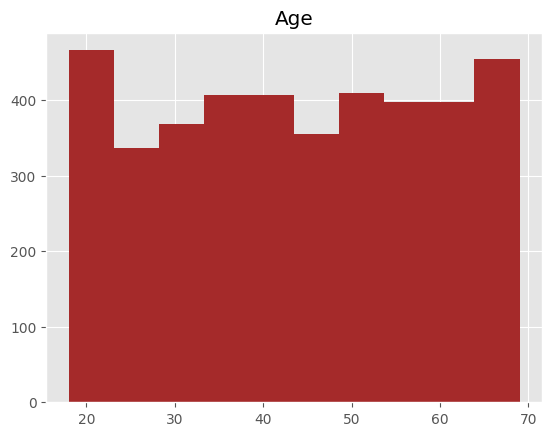

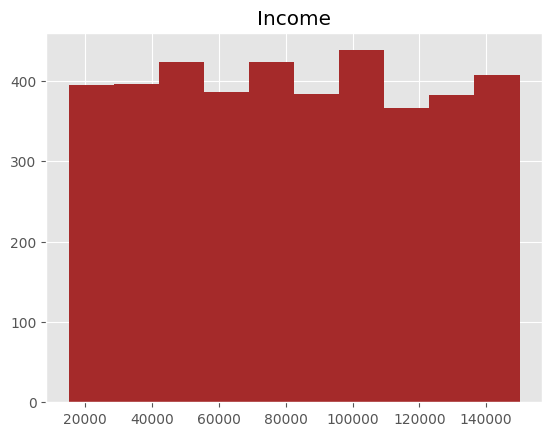

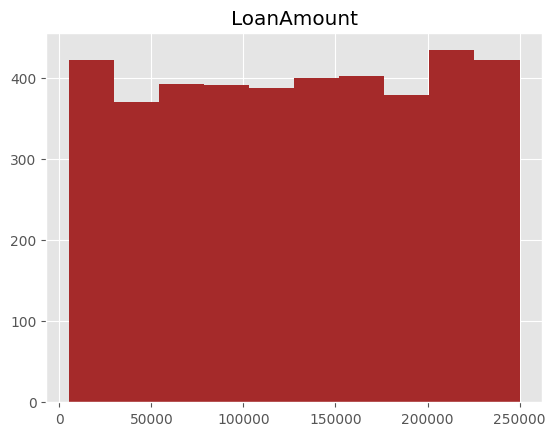

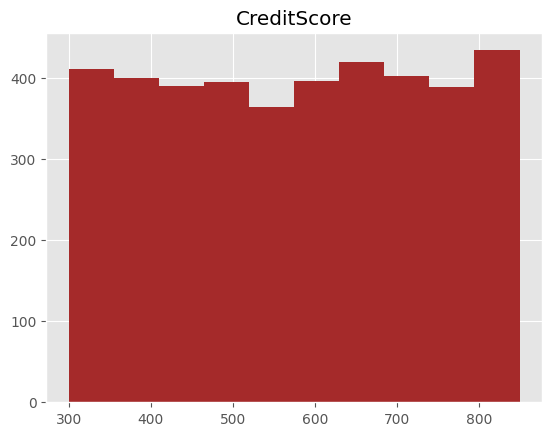

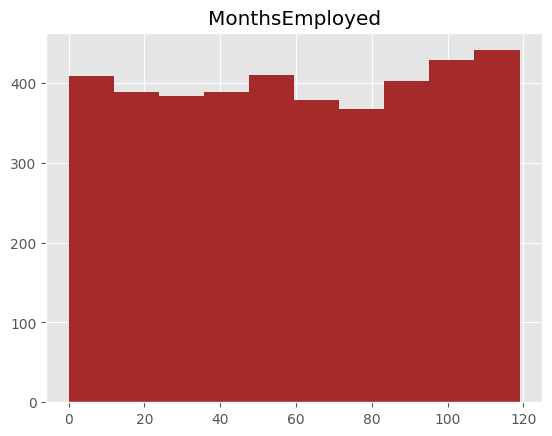

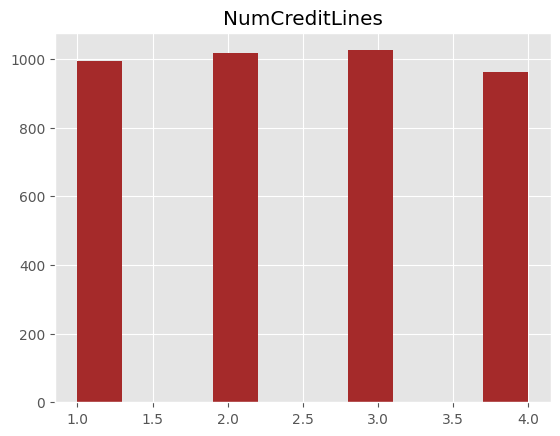

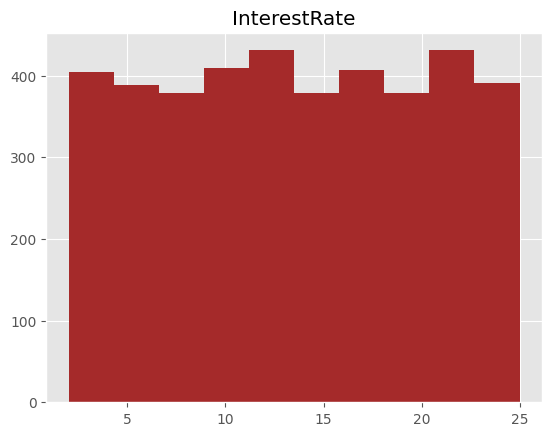

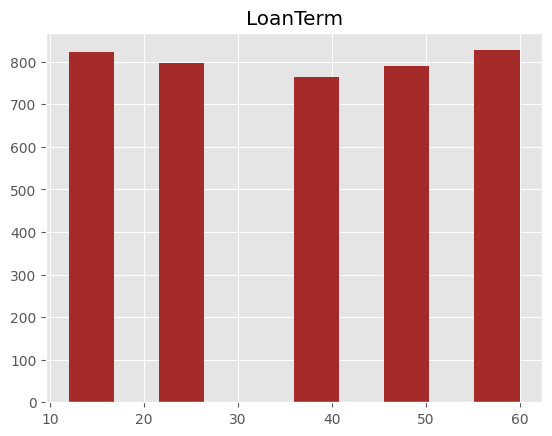

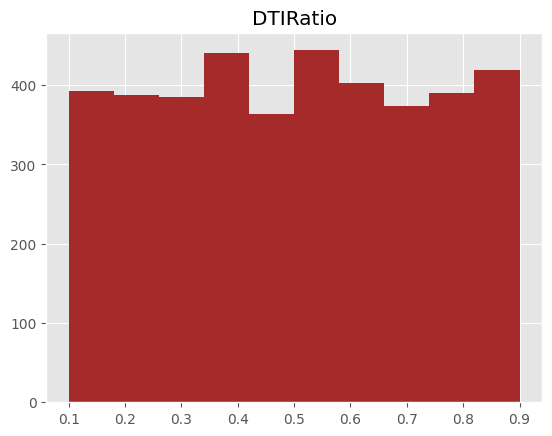

In [ ]:
# Looping through each column in the 'data_numerical' DataFrame to plot histograms for each numerical feature.
# The 'plt.style.use('ggplot')' applies the 'ggplot' style to the plots for better aesthetics.
# 'plt.hist()' is used to create a histogram for each column, with a 'skyblue' color for the bars.
# The 'plt.title(i)' sets the title of the plot to the column name (i.e., the feature being plotted).
# 'plt.show()' displays the plot.

for i in data_numerical.columns:
    plt.style.use('ggplot')
    plt.hist(data_numerical[i], color = 'brown')
    plt.title(i)
    plt.show()

Heatmap of the numerical categories.

                     Age    Income  LoanAmount  CreditScore  MonthsEmployed  \
Age             1.000000 -0.004972    0.002118    -0.026053        0.003219   
Income         -0.004972  1.000000   -0.021905    -0.029889        0.022537   
LoanAmount      0.002118 -0.021905    1.000000     0.017763       -0.006339   
CreditScore    -0.026053 -0.029889    0.017763     1.000000       -0.011108   
MonthsEmployed  0.003219  0.022537   -0.006339    -0.011108        1.000000   
NumCreditLines  0.009683  0.021627    0.000289    -0.004403        0.023076   
InterestRate   -0.021150 -0.010962   -0.008043     0.001030       -0.018372   
LoanTerm       -0.012020 -0.002650    0.004029    -0.010219        0.009450   
DTIRatio        0.005962  0.011323   -0.023500     0.007407       -0.002663   

                NumCreditLines  InterestRate  LoanTerm  DTIRatio  
Age                   0.009683     -0.021150 -0.012020  0.005962  
Income                0.021627     -0.010962 -0.002650  0.011323  
LoanAmou

Text(0.5, 1.0, 'Heatmap with range 0 to 1')

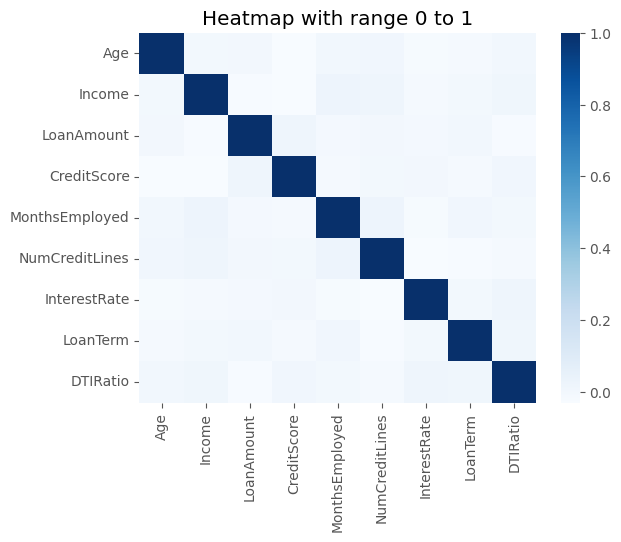

In [ ]:
# Using the 'corr()' function to calculate the correlation matrix for the numerical columns in the 'data_numerical' DataFrame.
# 'data_numerical.corr()' returns a correlation matrix showing the pairwise correlations between numerical columns.

print(data_numerical.corr())

# Using Seaborn to create a heatmap to visualize the correlation matrix.
# 'sns.heatmap()' generates a heatmap of the correlation matrix with a 'Blues' color palette.
# The 'set_title()' method sets the title of the heatmap.

sns.heatmap(data_numerical.corr(), cmap="Blues").set_title('Heatmap with range 0 to 1')

Text(0.5, 1.0, 'Heatmap with range 0 to 0.01')

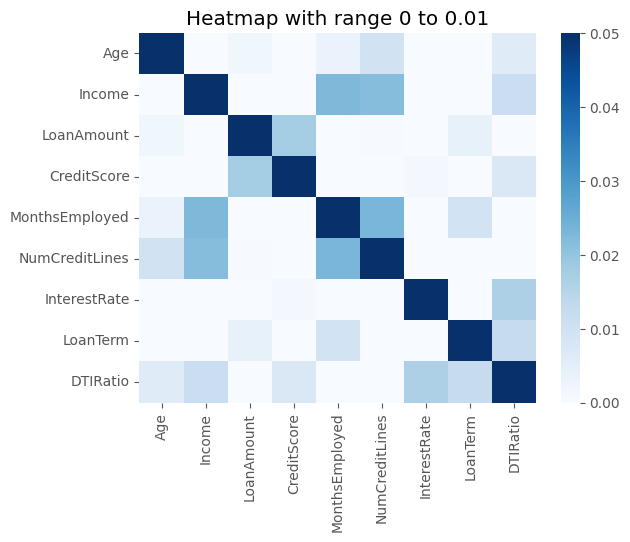

In [ ]:
# Using Seaborn to create a heatmap to visualize the correlation matrix with a custom color range.
# 'sns.heatmap()' generates a heatmap of the correlation matrix with a 'Blues' color palette.
# The 'vmin' and 'vmax' parameters are set to 0 and 0.01, respectively, limiting the color scale range to between 0 and 0.01.
# The 'set_title()' method sets the title of the heatmap.

sns.heatmap(data_numerical.corr(), cmap="Blues",vmin=0, vmax=0.05).set_title('Heatmap with range 0 to 0.05')

None of the numerical categories appear to have much correlation with each other in the default heatmap, but reducing the maximum value in the color bar allows us to see that there is a slightly higher correlation between a few of the categories

In [ ]:
# Creating a pivot table using pandas' 'pivot_table()' function.
# The 'index' is set to 'Default', so the rows of the pivot table will be grouped by the 'Default' column (indicating whether a loan defaulted or not).
# The 'values' parameter includes a list of numerical columns, and for each 'Default' category, the pivot table will display the corresponding values for these columns.

pd.pivot_table(data, index = 'Default', values = ['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio'])

,Age,CreditScore,DTIRatio,Income,InterestRate,LoanAmount,LoanTerm,MonthsEmployed,NumCreditLines
Default,,,,,,,,,
0,44.630533,578.853008,0.493539,83515.729285,13.208048,126774.797957,35.914869,61.663734,2.476447
1,37.319328,558.880252,0.526113,72781.313025,15.948466,144880.764706,36.630252,50.289916,2.581933


Customers who did not default on average were older, had a higher credit score, lower debt to income ration, higher income, a lower interest rate on their loan, a smaller loan, a shorter loan term, longer employment history, and fewer credit lines.

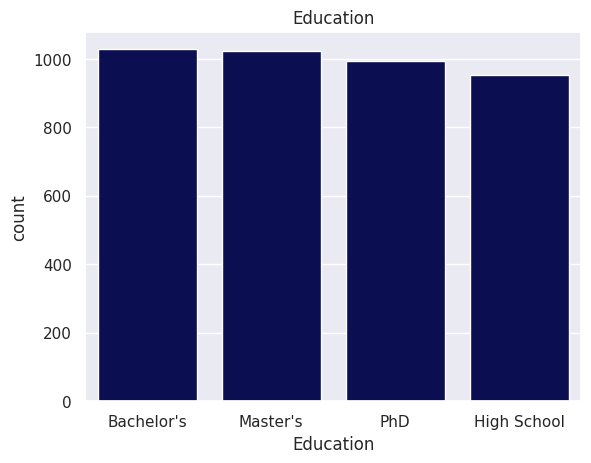

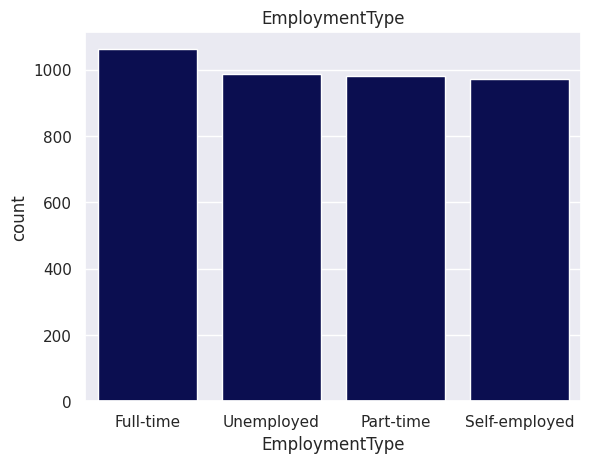

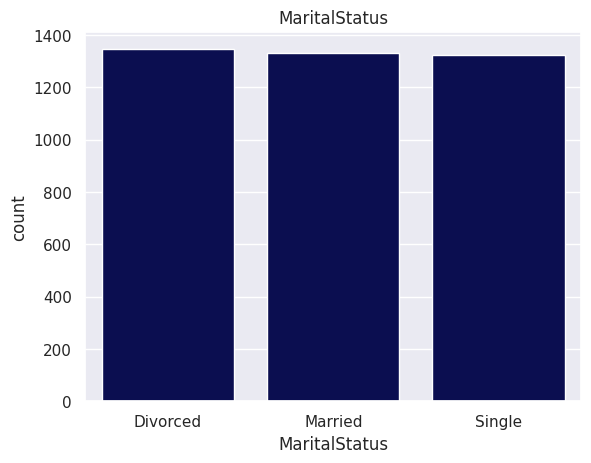

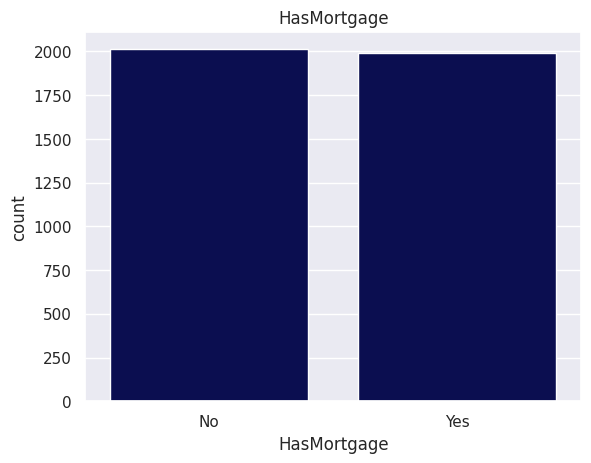

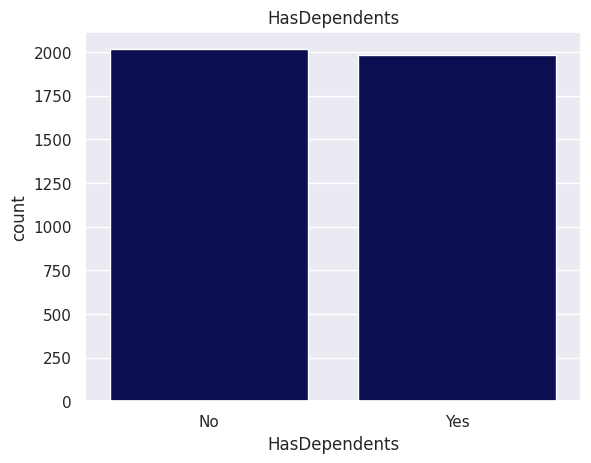

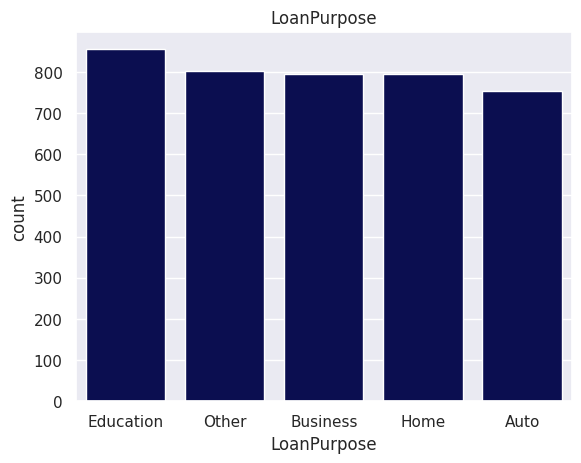

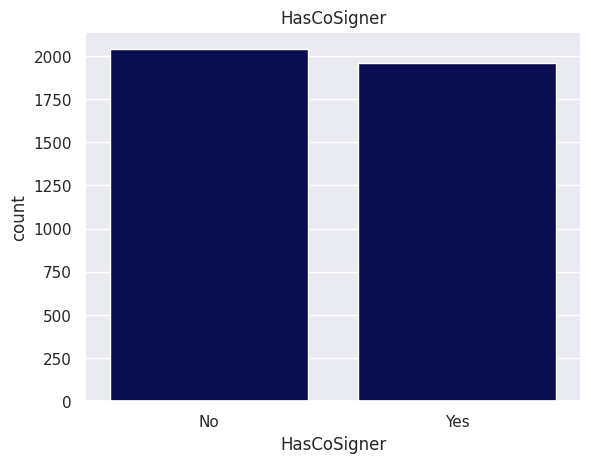

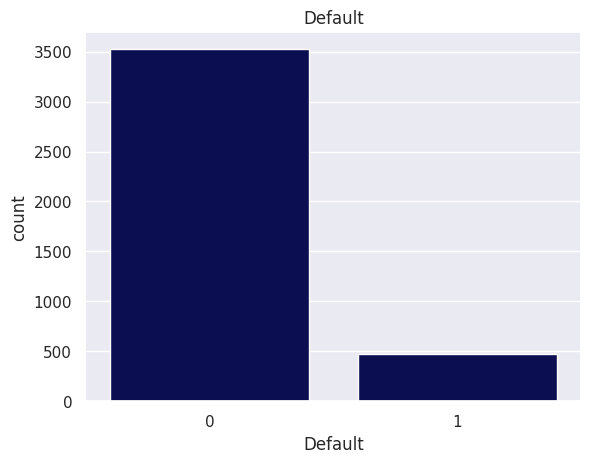

In [ ]:
for i in data_categorical.columns:
    # color palette can be passed as a list of hex codes
    custom_colors = ["xkcd:dark blue", "xkcd:royal blue", "xkcd:blue", "xkcd:sky blue", "xkcd:lightblue" ]
    # set overall plot style, font size scaling factor, and color palette
    sns.set(palette = custom_colors)
    sns.barplot(x=data_categorical[i].value_counts().index, y=data_categorical[i].value_counts()).set_title(i)
    plt.show()

In all categories, except Default, the data are evenly distributed

In [ ]:
# Creating multiple pivot tables using pandas' 'pivot_table()' function.
# Each pivot table groups the data by the 'Default' column and counts the occurrences of 'LoanID' within different categories of various categorical variables.
# The 'aggfunc = count' argument is used to count the number of 'LoanID' entries in each group.

print(pd.pivot_table(data, index = 'Default', columns = 'Education', values = 'LoanID', aggfunc ='count'))
print('\n')
print(pd.pivot_table(data, index = 'Default', columns = 'EmploymentType', values = 'LoanID', aggfunc ='count'))
print('\n')
print(pd.pivot_table(data, index = 'Default', columns = 'HasMortgage', values = 'LoanID', aggfunc ='count'))
print('\n')
print(pd.pivot_table(data, index = 'Default', columns = 'HasDependents', values = 'LoanID', aggfunc ='count'))
print('\n')
print(pd.pivot_table(data, index = 'Default', columns = 'LoanPurpose', values = 'LoanID', aggfunc ='count'))
print('\n')
print(pd.pivot_table(data, index = 'Default', columns = 'HasCoSigner', values = 'LoanID', aggfunc ='count'))

Education  Bachelor's  High School  Master's  PhD
Default                                          
0                 912          812       917  883
1                 116          141       107  112


EmploymentType  Full-time  Part-time  Self-employed  Unemployed
Default                                                        
0                     964        850            862         848
1                      98        130            109         139


HasMortgage    No   Yes
Default                
0            1768  1756
1             244   232


HasDependents    No   Yes
Default                  
0              1743  1781
1               273   203


LoanPurpose  Auto  Business  Education  Home  Other
Default                                            
0             661       687        748   720    708
1              92       108        107    74     95


HasCoSigner    No   Yes
Default                
0            1770  1754
1             269   207


 Data pre-processing:
1. There are no null or incorrect instances that need to be fixed prior to modeling
2. LoanID doesn't have any relevance to undergo processing by the models
3. Encoded all categorical variables# Splitting the data into training and testing sets using 'train_test_split' from sklearn.



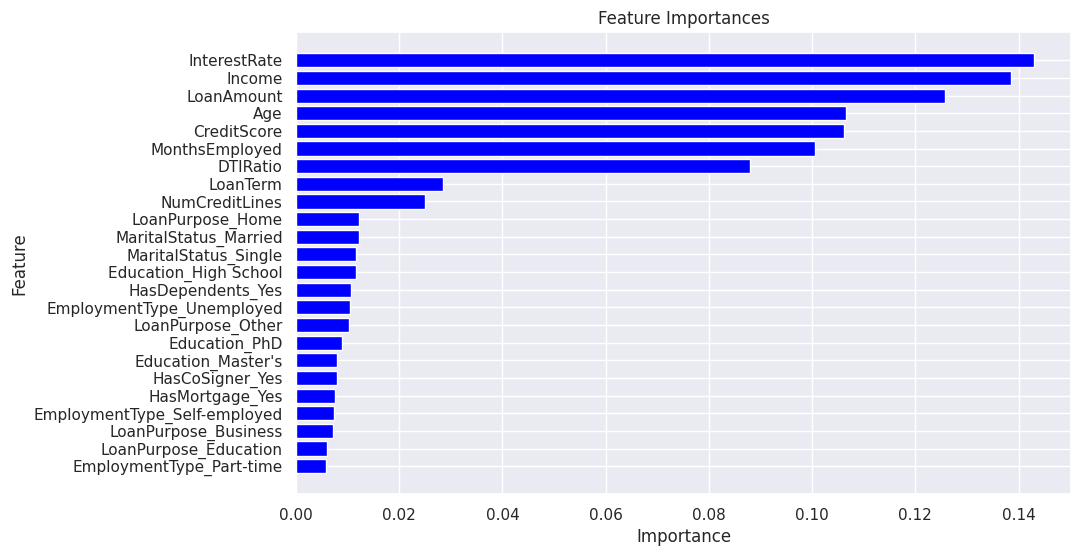

In [ ]:
# Splitting the data into training and testing sets using 'train_test_split' from sklearn.
# 30% of the data is reserved for testing (test_size=0.3), and the remaining 70% is used for training.

data_train, data_test = train_test_split(data, test_size=0.3)

# Defining the feature set (X) and target variable (y) for training and testing.
# Dropping 'LoanID' and 'Default' columns as they are not relevant for the features.

X_train_pre = data_train.drop(['Default','LoanID'], axis=1)
y_train = data_train.Default
X_test_pre = data_test.drop(['Default','LoanID'], axis=1)
y_test = data_test.Default

# One-hot encoding all categorical columns in the training data.
# 'get_dummies()' encodes categorical columns into separate binary columns.
# 'drop_first=True' drops the first category of each categorical column to avoid multicollinearity.

X_encoded = pd.get_dummies(X_train_pre, columns=X_train_pre.select_dtypes(include=['object']).columns, drop_first=True)

# Initializing and fitting a RandomForestRegressor model.
# The model is trained on the one-hot encoded feature set (X_encoded) and the target variable (y_train).

rf_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
rf_regressor.fit(X_encoded, y_train)

# Extracting feature importances from the trained Random Forest model.
# This provides the relative importance of each feature in predicting the target variable.

feature_importances = rf_regressor.feature_importances_

# Creating a DataFrame to store the feature names and their corresponding importances.

importance_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances using a horizontal bar chart.
# This allows us to visualize which features are most significant for the model.

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='blue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

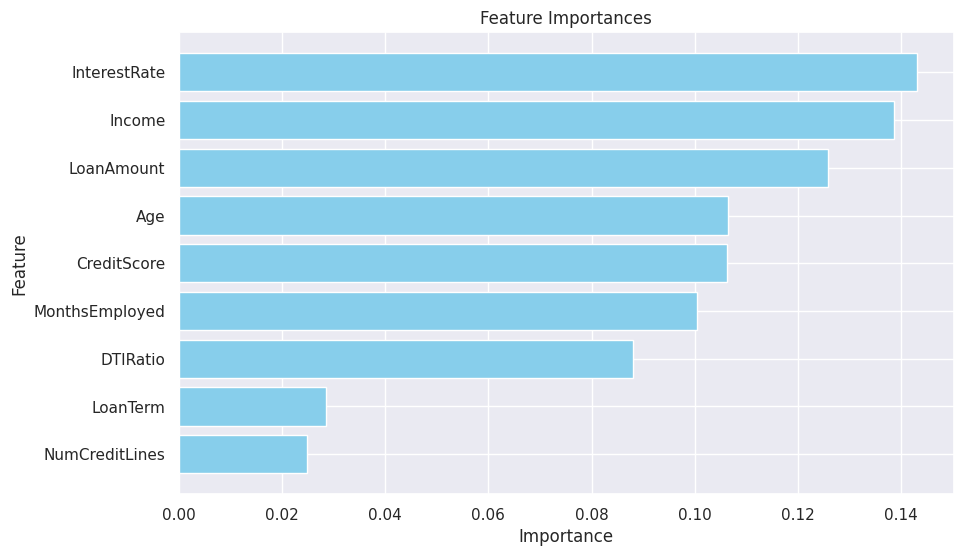

In [ ]:
# Filtering the 'importance_df' DataFrame to keep only the features with an importance rating of 0.02 or higher.
# Features with importance less than 0.02 are excluded, focusing on the most significant features.

importance_df = importance_df.loc[lambda x: x['Importance'] >= 0.02]

# Plotting the filtered feature importances using a horizontal bar chart.
# This will show only the most important features, based on the new threshold.

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
# Dropping the columns with low importance ratings from the training and testing feature sets.
# The columns 'LoanPurpose', 'MaritalStatus', 'Education', 'EmploymentType', 'HasMortgage', 'HasDependents', and 'HasCoSigner' are excluded.
# These columns were identified as less significant based on their low importance ratings in the feature importance analysis.

X_train_unscaled = X_train_pre.drop(['LoanPurpose','MaritalStatus', 'Education', 'EmploymentType', 'HasMortgage', 'HasDependents', 'HasCoSigner'], axis=1)
X_test = X_test_pre.drop(['LoanPurpose','MaritalStatus', 'Education', 'EmploymentType', 'HasMortgage', 'HasDependents', 'HasCoSigner'], axis = 1)

In [ ]:
# Using Synthetic Minority Over-Sampling Technique SMOTE to balance the Default category.
# Prior to using smote the data are in an approximately 90/10 split.
# After SMOTE synthetic positive Default datapoints are added so the dataset is 50/50.

smote = SMOTE(random_state=20)
X_resampled, y_train = smote.fit_resample(X_train_unscaled, y_train)

In [ ]:
# Using the 'describe()' function to generate descriptive statistics for the target variable 'y_train'.
# This provides insights such as the count, mean, standard deviation, minimum, and maximum values, as well as the 25th, 50th, and 75th percentiles for the 'Default' column.

y_train.describe() ## Display summary statistics for the target variable.

,Default
count,4984.00000
mean,0.50000
std,0.50005
min,0.00000
25%,0.00000
50%,0.50000
75%,1.00000
max,1.00000


In [ ]:
# Scaling the numerical features to standardize them, so they are on the same scale and prevent certain features (like Income and LoanAmount) from disproportionately influencing the model.
# The StandardScaler standardizes the features by removing the mean and scaling to unit variance.

scale = StandardScaler()

# Applying scaling to the numerical columns in the training set (X_train).
# The 'fit_transform()' method is used to calculate the mean and standard deviation and then scale the data accordingly.

X_train = X_resampled.copy()
X_train[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']] = scale.fit_transform(X_train[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']])

# Scaling the numerical columns in the test set (X_test) using the same scaler fitted on the training data.
# The 'fit_transform()' method is used to apply the scaling transformation to the test set.

X_test = X_test.copy()
X_test[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']] = scale.fit_transform(X_test[['Age', 'Income', 'LoanAmount', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm', 'DTIRatio']])



# Using OneHotEncoder to encode categorical variables into binary numerical values.
# 'get_dummies()' is applied to the categorical columns, converting them into one-hot encoded columns.

X_train = pd.get_dummies(X_train, columns=X_train.select_dtypes(include=['object']).columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=X_test.select_dtypes(include=['object']).columns, drop_first=True)

Since the none of the data in the training set is normal we will primarily focus on machine learning models that do not assume gaussian distribution. For the first pass we will do 5 fold baseline cross validation with several models without any performance tuning.

# 1. logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model_performance = {}

In [ ]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
model_performance['Logistic Regression'] = {
    'accuracy': accuracy_score(y_test, y_pred_lr),
    'precision': precision_score(y_test, y_pred_lr),
    'recall': recall_score(y_test, y_pred_lr),
    'f1_score': f1_score(y_test, y_pred_lr),
    'roc_auc': roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])
}

In [ ]:
print("Logistic Regression Performance:")
for metric, value in model_performance['Logistic Regression'].items():
    print(f"{metric}: {value}")

Logistic Regression Performance:
accuracy: 0.5741666666666667
precision: 0.21079258010118043
recall: 0.7440476190476191
f1_score: 0.328515111695138
roc_auc: 0.693625415282392


#2. decision tree classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
model_performance['Decision Tree'] = {
    'accuracy': accuracy_score(y_test, y_pred_dt),
    'precision': precision_score(y_test, y_pred_dt),
    'recall': recall_score(y_test, y_pred_dt),
    'f1_score': f1_score(y_test, y_pred_dt),
    'roc_auc': roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])
}

In [ ]:
print("Decision Tree Performance:")
for metric, value in model_performance['Decision Tree'].items():
    print(f"{metric}: {value}")

Decision Tree Performance:
accuracy: 0.5875
precision: 0.18618042226487524
recall: 0.5773809523809523
f1_score: 0.28156748911465895
roc_auc: 0.5832641196013288


#3. random forest

In [ ]:

# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
model_performance['Random Forest'] = {
    'accuracy': accuracy_score(y_test, y_pred_rf),
    'precision': precision_score(y_test, y_pred_rf),
    'recall': recall_score(y_test, y_pred_rf),
    'f1_score': f1_score(y_test, y_pred_rf),
    'roc_auc': roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
}

In [ ]:
print("Random Forest Performance:")
for metric, value in model_performance['Random Forest'].items():
    print(f"{metric}: {value}")

Random Forest Performance:
accuracy: 0.6266666666666667
precision: 0.19162995594713655
recall: 0.5178571428571429
f1_score: 0.2797427652733119
roc_auc: 0.615889742524917


In [ ]:
# Model Performance Summary
print("Model Performance Summary:")
for model, metrics in model_performance.items():
    print(f"\n{model}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")

Model Performance Summary:

Logistic Regression:
accuracy: 0.5742
precision: 0.2108
recall: 0.7440
f1_score: 0.3285
roc_auc: 0.6936

Decision Tree:
accuracy: 0.5875
precision: 0.1862
recall: 0.5774
f1_score: 0.2816
roc_auc: 0.5833

Random Forest:
accuracy: 0.6267
precision: 0.1916
recall: 0.5179
f1_score: 0.2797
roc_auc: 0.6159


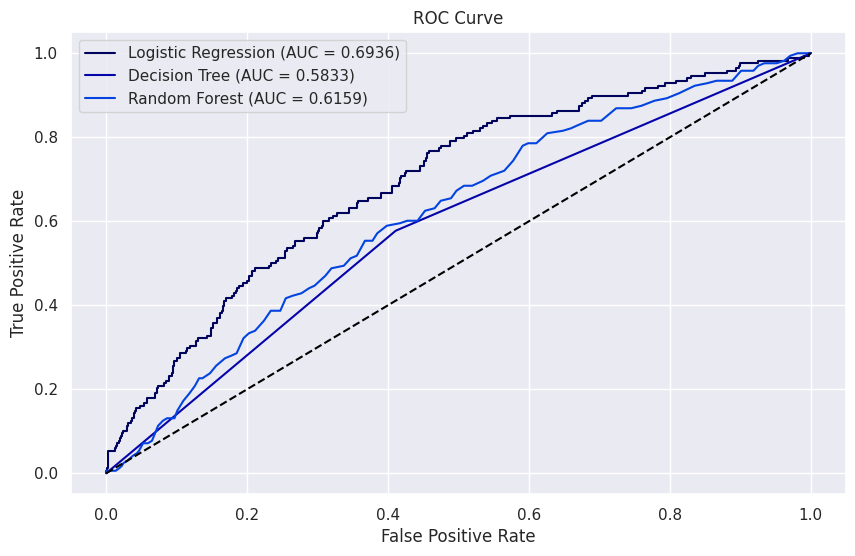

In [ ]:
# ROC Curve
plt.figure(figsize=(10, 6))
for model, clf in [('Logistic Regression', lr), ('Decision Tree', dt), ('Random Forest', rf)]:
    fpr, tpr, _ = roc_curve(y_test, clf.predict_proba(X_test)[:, 1])
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]):.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#From this ROC (Receiver Operating Characteristic) curve graph, I can make several key observations:

##Model Performance Comparison:


Logistic Regression performed best with an AUC (Area Under Curve) of 0.6936

Random Forest was second best with an AUC of 0.6159

Decision Tree performed worst with an AUC of 0.5833


##Overall Performance:


All models performed moderately, as their AUC scores are between 0.58-0.70

None of the models achieved excellent performance (which would typically be AUC > 0.8)

All models performed better than random chance (represented by the dashed diagonal line with AUC = 0.5)


##Model Characteristics:


Logistic Regression shows consistently better true positive rates across most false positive rates

The curves are relatively smooth, suggesting stable model performance

There's a clear trade-off between true positive rate and false positive rate for all models


##Practical Implications:


For loan default prediction (assuming this is the context), the models provide some predictive power but might need improvement

The Logistic Regression model would be the recommended choice among these three models

There might be room for improvement through feature engineering or trying other algorithms

#Performance Metrics Explained
##Key Metrics Used:

Accuracy: Overall correctness of predictions
Precision: Ratio of correct positive predictions to total positive predictions

Recall: Ratio of correct positive predictions to actual positives

F1-Score: Harmonic mean of precision and recall

ROC-AUC: Area under the Receiver Operating Characteristic curve


##Model Comparison
###Logistic Regression

Accuracy: 57.42%
Precision: 21.08%
Recall: 74.40% 🏆
F1-Score: 32.85% 🏆
ROC-AUC: 69.36% 🏆

###Decision Tree

Accuracy: 58.75%
Precision: 18.62%
Recall: 57.74%
F1-Score: 28.16%
ROC-AUC: 58.33%

###Random Forest

Accuracy: 62.67% 🏆
Precision: 19.16%
Recall: 51.79%
F1-Score: 27.97%
ROC-AUC: 61.59%

##Conclusions

Logistic Regression shows the strongest overall performance across multiple metrics
Random Forest achieves the highest accuracy but lower recall
All models show room for improvement in precision
Consider model selection based on specific business requirements:

Need for high recall vs. high precision
Importance of overall accuracy
Model interpretability requirements

